### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
lojas = [loja1, loja2, loja3, loja4 ]
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
totais = {}
for i, loja in enumerate(lojas,start=1):
  total = loja['Preço'].sum()
  totais[f'Loja {i}'] = total
  print(f"loja {i}: R$ {total:,.2f}")

loja 1: R$ 1,534,509.12
loja 2: R$ 1,488,459.06
loja 3: R$ 1,464,025.03
loja 4: R$ 1,384,497.58


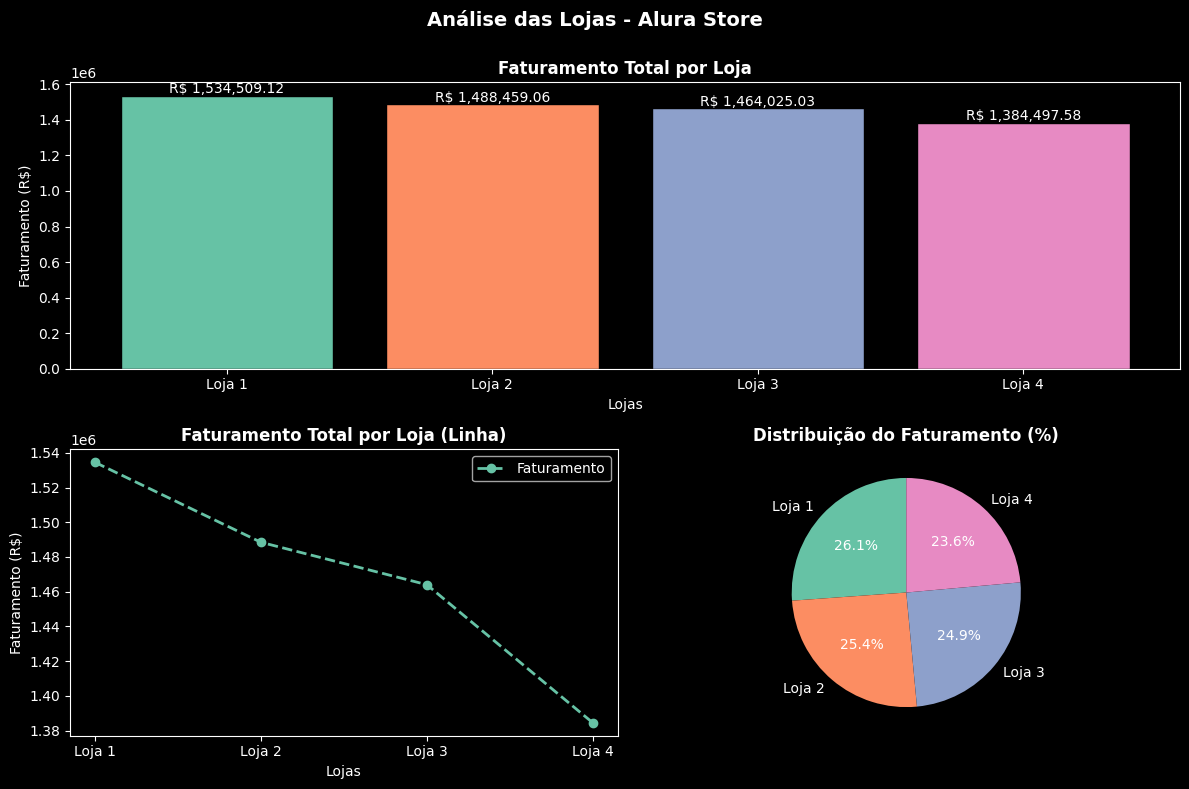

In [ ]:
plt.style.use('dark_background')
cores = plt.cm.Set2.colors[:len(totais)]

fig = plt.figure(figsize=(12,8))
grid = fig.add_gridspec(2,2)

# GRÁFICO DE BARRAS
ax_barra = fig.add_subplot(grid[0,:])
ax_barra.bar(totais.keys(), totais.values(), color=cores, edgecolor='black')
ax_barra.set_title('Faturamento Total por Loja', fontsize=12, fontweight='bold')
ax_barra.set_xlabel('Lojas')
ax_barra.set_ylabel('Faturamento (R$)')
ax_barra.set_xticks(range(len(totais)))
ax_barra.set_xticklabels(totais.keys())

for i, valor in enumerate(totais.values()):
    ax_barra.text(i, valor + (valor * 0.01), f"R$ {valor:,.2f}", ha='center', fontsize=10)

# GRÁFICO DE LINHA
ax_linha = fig.add_subplot(grid[1,0])
ax_linha.plot(totais.keys(), totais.values(),
              label='Faturamento', linestyle='--', marker='o',
              color=cores[0], linewidth=2)
ax_linha.set_title('Faturamento Total por Loja (Linha)', fontsize=12, fontweight='bold')
ax_linha.set_xlabel('Lojas')
ax_linha.set_ylabel('Faturamento (R$)')
ax_linha.legend(loc='upper right')

# GRÁFICO DE PIZZA
ax_pizza = fig.add_subplot(grid[1,1])
ax_pizza.pie(totais.values(), labels=totais.keys(), autopct='%1.1f%%',
             colors=cores, startangle=90)
ax_pizza.set_title('Distribuição do Faturamento (%)', fontsize=12, fontweight='bold')


fig.suptitle('Análise das Lojas - Alura Store', fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('Grafico1.png')
plt.show()


# 2. Vendas por Categoria

In [ ]:
lojas = [loja1, loja2, loja3, loja4]
nomes = ['Loja A', 'Loja B', 'Loja C', 'Loja D']
total_vendas = {}

for nome, df_loja in zip(nomes, lojas):
    # Agrupa as vendas por categoria
    contagem = df_loja.groupby('Categoria do Produto')['Preço'].count().reset_index()
    contagem.rename(columns={'Preço': 'Qtd_Vendas'}, inplace=True)

    # Calcula o total de vendas da loja (soma de todas as categorias)
    total_loja = contagem['Qtd_Vendas'].sum()

    # Salva no dicionário
    total_vendas[nome] = {
        'categorias': contagem,
        'total': total_loja
    }

    # Exibe os dados
    print(f"\n{nome} - Vendas por Categoria:")
    print(contagem)
    print(f"Total de Vendas da {nome}: {total_loja}")



Loja A - Vendas por Categoria:
    Categoria do Produto  Qtd_Vendas
0             brinquedos         324
1       eletrodomesticos         312
2            eletronicos         448
3        esporte e lazer         284
4  instrumentos musicais         182
5                 livros         173
6                 moveis         465
7  utilidades domesticas         171
Total de Vendas da Loja A: 2359

Loja B - Vendas por Categoria:
    Categoria do Produto  Qtd_Vendas
0             brinquedos         313
1       eletrodomesticos         305
2            eletronicos         422
3        esporte e lazer         275
4  instrumentos musicais         224
5                 livros         197
6                 moveis         442
7  utilidades domesticas         181
Total de Vendas da Loja B: 2359

Loja C - Vendas por Categoria:
    Categoria do Produto  Qtd_Vendas
0             brinquedos         315
1       eletrodomesticos         278
2            eletronicos         451
3        esporte e lazer  

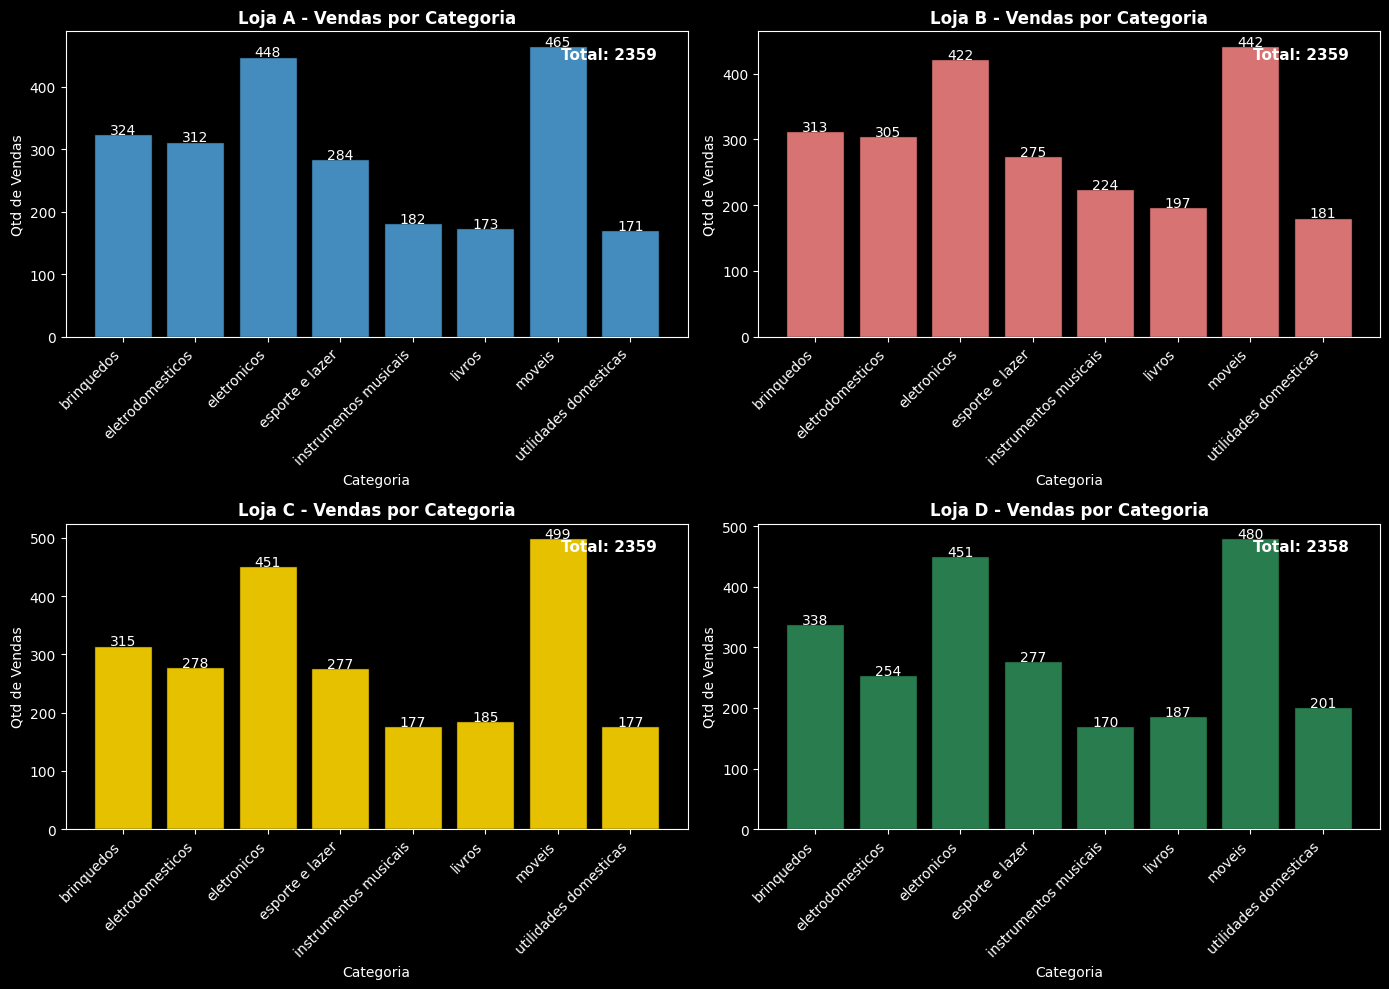

In [16]:
cores = ['#4B9CD3', '#F08080', '#FFD700', '#2E8B57']

fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, (nome, df_loja) in enumerate(zip(nomes, lojas)):


    contagem = df_loja.groupby('Categoria do Produto')['Preço'].count().reset_index()
    contagem.rename(columns={'Preço': 'Qtd_Vendas'}, inplace=True)

    total_loja = contagem['Qtd_Vendas'].sum()

    axes[i].bar(contagem['Categoria do Produto'], contagem['Qtd_Vendas'],
                color=cores[i], edgecolor='black', alpha=0.9)


    axes[i].set_title(f'{nome} - Vendas por Categoria', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Categoria', fontsize=10)
    axes[i].set_ylabel('Qtd de Vendas', fontsize=10)
    axes[i].set_xticks(range(len(contagem['Categoria do Produto'])))
    axes[i].set_xticklabels(contagem['Categoria do Produto'], rotation=45, ha='right')


    for j, valor in enumerate(contagem['Qtd_Vendas']):
        axes[i].text(j, valor + 0.2, str(valor), ha='center', fontsize=10)


    axes[i].text(0.95, 0.95, f"Total: {total_loja}", transform=axes[i].transAxes,
                 ha='right', va='top', fontsize=11, fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('Grafico2.png')
plt.show()


# 3. Média de Avaliação das Lojas


In [ ]:
media_avaliacao = {}
for i, loja in enumerate(lojas,start = 1):
  media = loja['Avaliação da compra'].mean()
  media_avaliacao[f'Loja {i}'] = media
  print(f"Media de avaliação da loja {i}: {media:,.3f}")

Media de avaliação da loja 1: 3.977
Media de avaliação da loja 2: 4.037
Media de avaliação da loja 3: 4.048
Media de avaliação da loja 4: 3.996


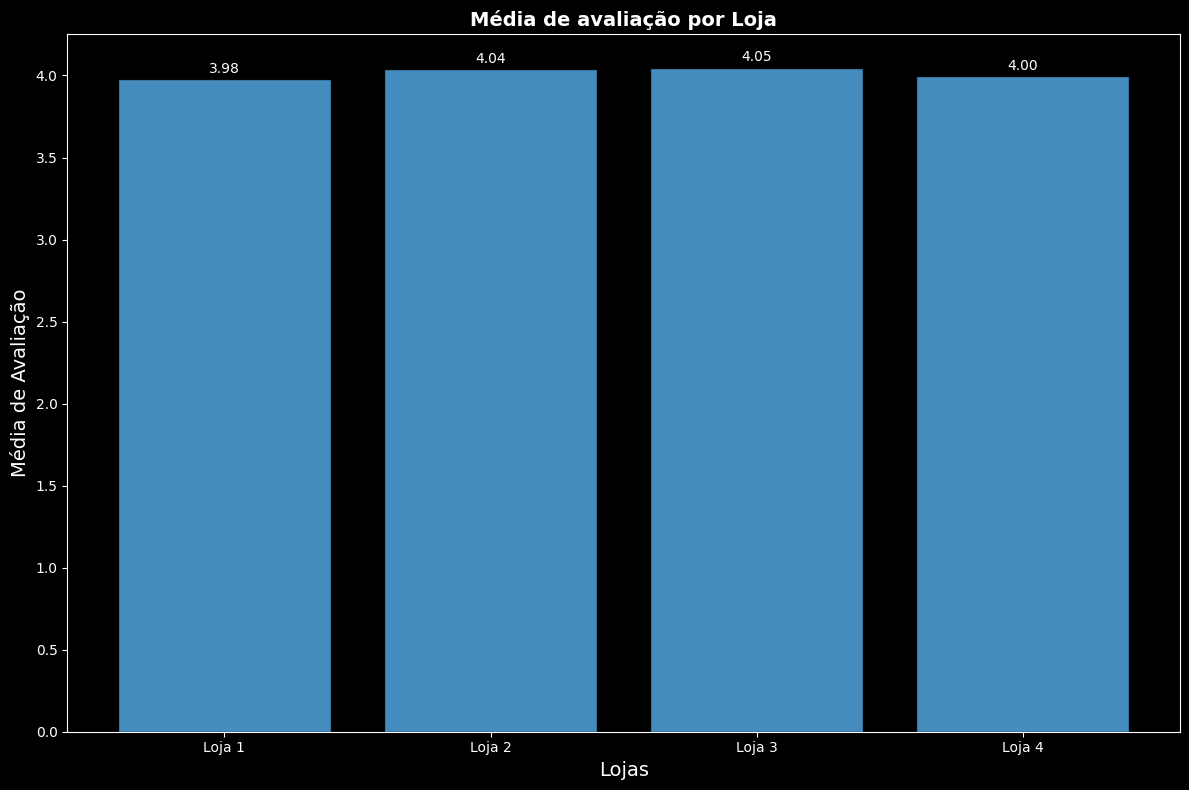

In [ ]:
plt.figure(figsize=(12,8))



plt.bar(media_avaliacao.keys(), media_avaliacao.values(), color = '#4B9CD3', edgecolor='black', alpha = 0.9)
plt.title('Média de avaliação por Loja', fontsize = 14, fontweight = 'bold')
plt.xlabel('Lojas', fontsize = 14)
plt.ylabel('Média de Avaliação', fontsize = 14)
plt.xticks(rotation=0)

for i, ava in enumerate(media_avaliacao.values()):
  plt.text(i,ava + (ava * 0.01), f"{ava:,.2f}" ,ha = 'center', fontsize=10)


plt.tight_layout()
plt.savefig('Grafico3.png')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos_mais = {}
produtos_menos = {}

mais = {}
menos = {}

for i, loja in enumerate(lojas, start=1):

    mais_vendido = loja['Produto'].value_counts().nlargest(1)
    produtos_mais[f'Loja {i}'] = mais_vendido.index[0]
    mais[f'Loja {i}'] = mais_vendido.values[0]


    menos_vendido = loja['Produto'].value_counts().nsmallest(1)
    produtos_menos[f'Loja {i}'] = menos_vendido.index[0]
    menos[f'Loja {i}'] = menos_vendido.values[0]

    print(f"\nLoja {i}:")
    print(f"Produto mais vendido: {produtos_mais[f'Loja {i}']} ({mais[f'Loja {i}']} vendas)")
    print(f"Produto menos vendido: {produtos_menos[f'Loja {i}']} ({menos[f'Loja {i}']} vendas)")



Loja 1:
Produto mais vendido: Micro-ondas (60 vendas)
Produto menos vendido: Headset (33 vendas)

Loja 2:
Produto mais vendido: Iniciando em programação (65 vendas)
Produto menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3:
Produto mais vendido: Kit banquetas (57 vendas)
Produto menos vendido: Blocos de montar (35 vendas)

Loja 4:
Produto mais vendido: Cama box (62 vendas)
Produto menos vendido: Guitarra (33 vendas)


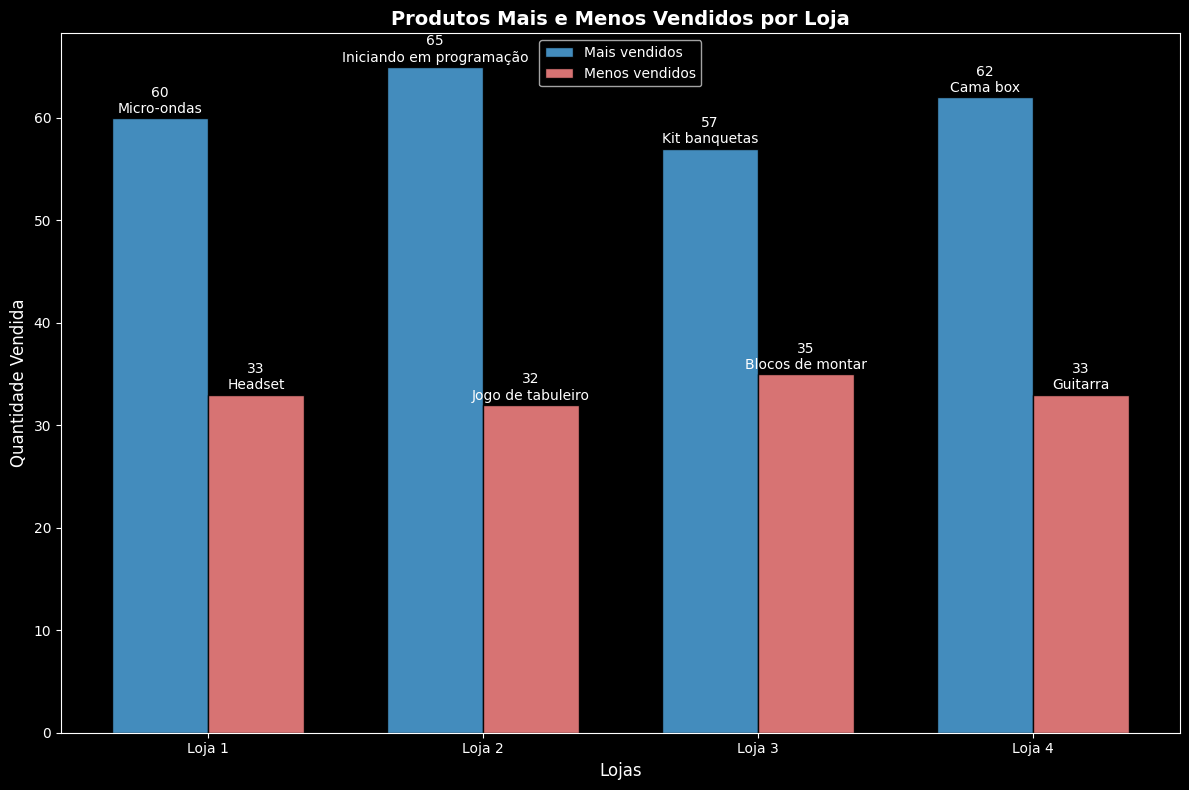

In [ ]:
plt.figure(figsize=(12,8))

bar_width = 0.35
x = np.arange(len(mais))


plt.bar(
    x - bar_width/2,
    mais.values(),
    width=bar_width,
    color='#4B9CD3',
    edgecolor='black',
    alpha=0.9,
    label='Mais vendidos'
)
plt.bar(
    x + bar_width/2,
    menos.values(),
    width=bar_width,
    color='#F08080',
    edgecolor='black',
    alpha=0.9,
    label='Menos vendidos'
)

plt.title('Produtos Mais e Menos Vendidos por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks(x, mais.keys())
plt.legend()


for i in x:

    plt.text(
        i - bar_width/2,
        mais[list(mais.keys())[i]] + 0.5,
        f"{mais[list(mais.keys())[i]]}\n{produtos_mais[list(mais.keys())[i]]}",
        ha='center',
        fontsize=10,
        color='white'
    )


    plt.text(
        i + bar_width/2,
        menos[list(menos.keys())[i]] + 0.5,
        f"{menos[list(menos.keys())[i]]}\n{produtos_menos[list(menos.keys())[i]]}",
        ha='center',
        fontsize=10,
        color='white'
    )

plt.tight_layout()
plt.savefig('Grafico4.png')
plt.show()


# 5. Frete Médio por Loja

In [ ]:
media_frete = {}  # cria o dicionário vazio

for i, loja in enumerate(lojas, start=1):
    media = loja['Frete'].mean()
    media_frete[f'Loja {i}'] = media
    print(f"Custo médio do frete na Loja {i}: R$ {media:.2f}")


Custo médio do frete na Loja 1: R$ 34.69
Custo médio do frete na Loja 2: R$ 33.62
Custo médio do frete na Loja 3: R$ 33.07
Custo médio do frete na Loja 4: R$ 31.28


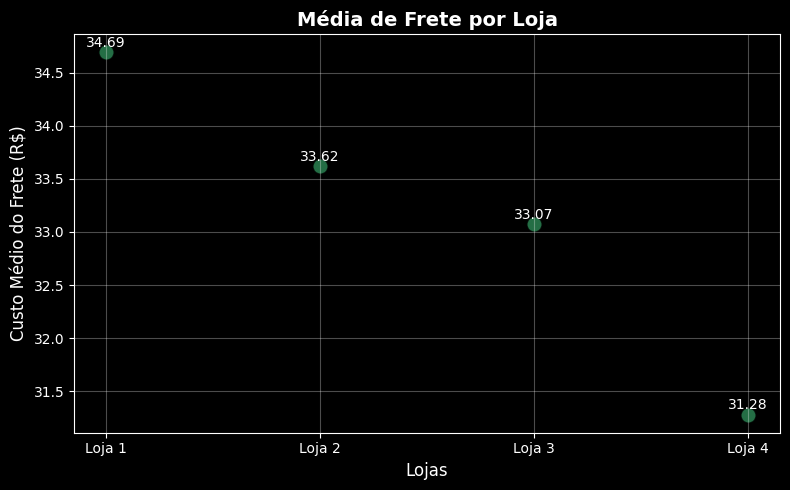

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter(
    media_frete.keys(),
    media_frete.values(),
    color='#2E8B57',
    s=120,
    edgecolors='black',
    alpha=0.8
)

plt.title('Média de Frete por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Custo Médio do Frete (R$)', fontsize=12)

for loja, frete in media_frete.items():
    plt.text(loja, frete + 0.05, f"{frete:.2f}", ha='center', fontsize=10)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('Grafico5.png')
plt.show()


Após a análise dos dados de vendas, avaliações e custos de frete das quatro lojas da rede Alura Store, os resultados mostram as seguintes conclusões:

Faturamento Total

Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

Loja 4: R$ 1.384.497,58 (menor faturamento)


Média de Avaliação dos Clientes

Loja 1: 3,98

Loja 2: 4,04

Loja 3: 4,05

Loja 4: 4,00


Custo Médio do Frete

Loja 1: R$ 34,69

Loja 2: R$ 33,62

Loja 3: R$ 33,07

Loja 4: R$ 31,28 (frete mais barato)


Produtos Mais e Menos Vendidos

Loja 1: mais vendido Micro-ondas (60), menos vendido Headset (33)

Loja 2: mais vendido Iniciando em programação (65), menos vendido Jogo de tabuleiro (32)

Loja 3: mais vendido Kit banquetas (57), menos vendido Blocos de montar (35)

Loja 4: mais vendido Cama box (62), menos vendido Guitarra (33)


Análise das Categorias

Todas as lojas possuem desempenho similar nas principais categorias, com destaque para Móveis e Eletrônicos, que concentram a maior parte das vendas.


---


Conclusão

Mesmo que a Loja 1 apresente o frete mais caro e a pior média de avaliação, o critério principal para a decisão de venda é o desempenho financeiro.
A Loja 4 é a que deve ser vendida, pois apresenta o menor faturamento total, indicando menor retorno econômico em relação às demais.
